In [1]:
import matplotlib.pyplot as plt
from endfiresim.wave import CWaveModelSpheric
from endfiresim.sensor import CEndfire
import endfiresim.algo as algo
import numpy as np

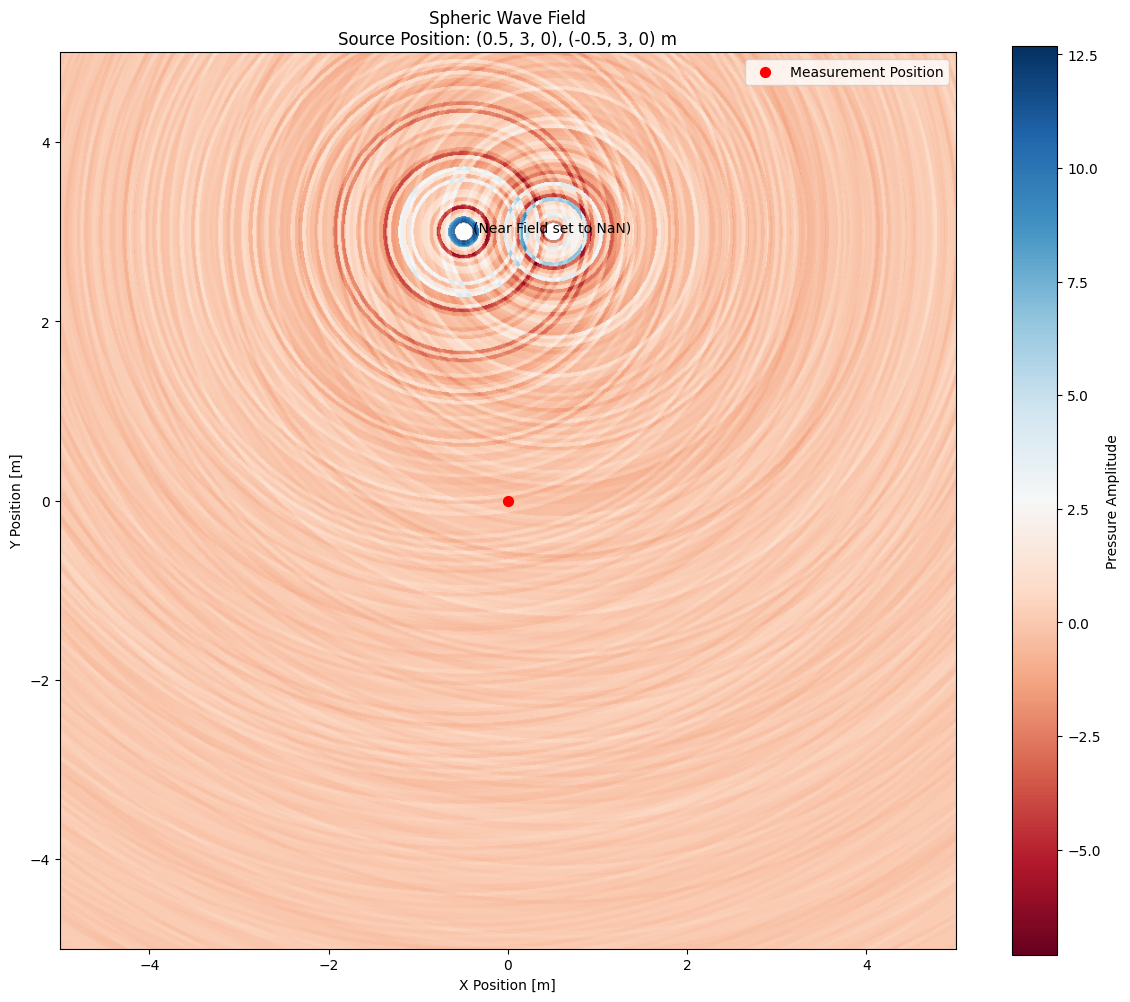

In [2]:
# Basic properties
freq = 300
fs = 48000
dur = 0.2
ts = np.arange(0, dur, 1/fs)
meas_pos = (0, 0, 0)

pos1 = (0.5, 3, 0)
pos2 = (-0.5, 3, 0)

# Wave model
sw = CWaveModelSpheric("wn", source_xyz=pos1) + CWaveModelSpheric("wn", source_xyz=pos2)

# Entire wave as heatmap
x = np.linspace(-5, 5, 1000)
x, y = np.meshgrid(x, x)
z = np.zeros_like(x)
p_field = sw.p(1, (x, y, z)) # pressure field at t = 0
p_point = sw.p(ts, meas_pos)  # pressure at point and over time frame t

# Plot wave field
fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(np.real(p_field), 
               extent=[x.min(), x.max(), y.min(), y.max()],
               cmap='RdBu', 
               origin='lower')

# Denote ideal measurement position
scatter = ax.scatter(meas_pos[0], meas_pos[1], s=50, color='r', label="Measurement Position")

# Add labels and decorations
ax.set_xlabel('X Position [m]')
ax.set_ylabel('Y Position [m]')
ax.set_title(f'Spheric Wave Field\n'
             f'Source Position: {pos1}, {pos2} m')
plt.colorbar(im, label='Pressure Amplitude')
ax.set_aspect('equal')
ax.annotate("(Near Field set to NaN)", pos1[:2], ha="center")

plt.legend()
plt.tight_layout()
plt.show()